In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [6]:
data_train = pd.read_csv("data/AMZN_train.csv")
data_val = pd.read_csv("data/AMZN_val.csv")
data_test = pd.read_csv('data/AMZN_test.csv')
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [7]:
def data_details(feed_data):
    print(f'Data Information:\n {feed_data.info()}\n')
    print(f'Data Details:\n {round(feed_data.describe(),2)}\n')
    print(f'No.of Rows and Columns:\n {feed_data.shape}\n')
    print(f'All columns of dataframes:\n {feed_data.columns}\n')
    print(f'Number of null values if exists: \n {feed_data.isna().sum()}\n')
    print(f'Duplicate values if any: \n {feed_data.duplicated().sum()}\n')
    plt.rcParams['figure.figsize']=(12,8)
    feed_data.plot(x='Date', y=['Open','Close','High','Low'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB
Data Information:
 None

Data Details:
           Open     High      Low    Close  Adj Close        Volume
count  4781.00  4781.00  4781.00  4781.00    4781.00  4.781000e+03
mean    127.62   129.48   125.70   127.66     127.66  8.225935e+06
std     145.69   147.13   144.05   145.68     145.68  7.810188e+06
min       1.41     1.45     1.31     1.40       1.40  4.872000e+05
25%      34.30    34.85    33.66    34.31      34.31  4.200900e+06
50%      62.88    64.75    6

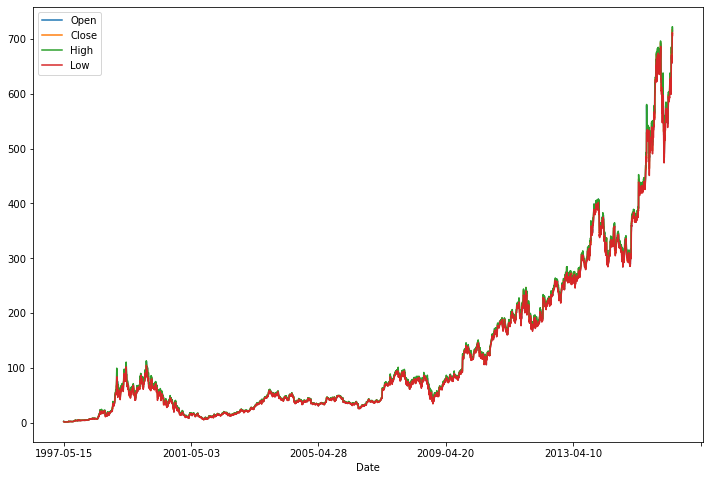

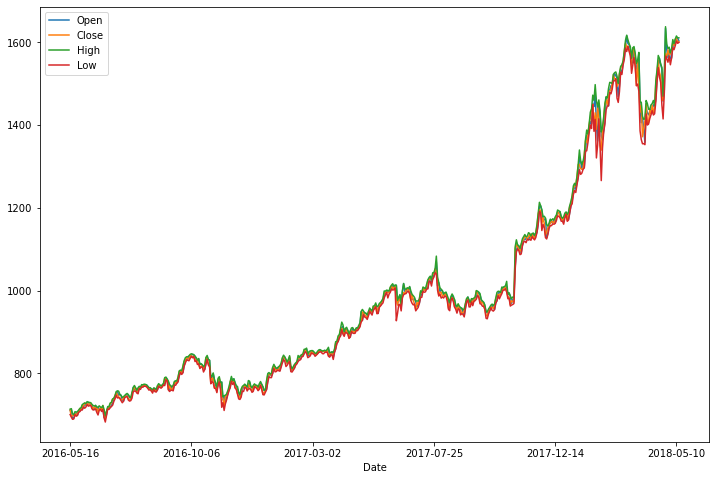

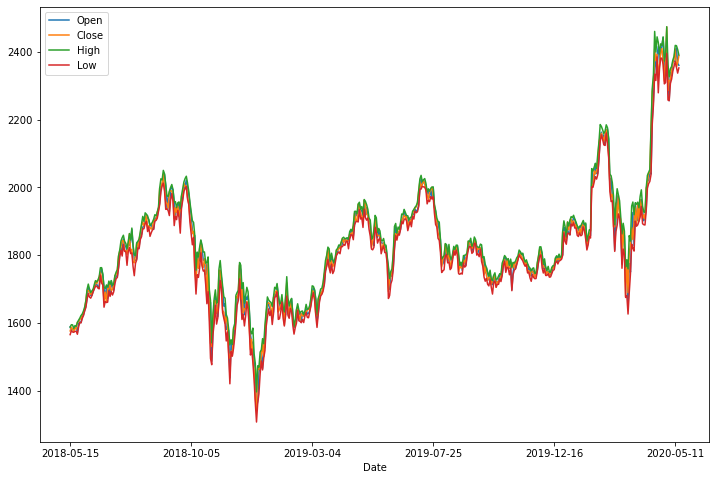

In [8]:
data_details(data_train)
data_details(data_val)
data_details(data_test)

In [9]:
data_train['Target'] = (data_train.Close>data_train.Open).shift(-1, fill_value=1).astype(int)
data_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


In [10]:
data_train.Target.value_counts()

1    2393
0    2388
Name: Target, dtype: int64

In [11]:
data_val['Target'] = (data_val.Close>data_val.Open).shift(-1, fill_value=1).astype(int)
data_test['Target'] = (data_test.Close>data_test.Open).shift(-1, fill_value=1).astype(int)

In [12]:
data_train['3DaysMovingAverage']=(data_train.Close-data_train.Open).rolling(window=3,min_periods=1).mean()
data_val['3DaysMovingAverage']=(data_val.Close-data_val.Open).rolling(window=3,min_periods=1).mean()
data_test['3DaysMovingAverage']=(data_test.Close-data_test.Open).rolling(window=3,min_periods=1).mean()
data_val.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target,3DaysMovingAverage
0,2016-05-16,710.130005,713.250000,700.280029,710.659973,710.659973,5432900,0,0.529968
1,2016-05-17,709.900024,714.469971,693.909973,695.270020,695.270020,5121400,1,-7.050018
2,2016-05-18,689.559998,702.539978,688.760010,697.450012,697.450012,4283200,1,-2.070007
3,2016-05-19,691.880005,699.400024,689.559998,698.520020,698.520020,3025600,1,-0.033325
4,2016-05-20,701.049988,707.239990,700.000000,702.799988,702.799988,2916200,0,5.426676


In [13]:
data_train['7DaysMovingAverage']=(data_train.Close-data_train.Open).rolling(window=7,min_periods=1).mean()
data_val['7DaysMovingAverage']=(data_val.Close-data_val.Open).rolling(window=7,min_periods=1).mean()
data_test['7DaysMovingAverage']=(data_test.Close-data_test.Open).rolling(window=7,min_periods=1).mean()

In [14]:
data_train['todaysTrend'] = data_train.Close-data_train.Open
data_val['todaysTrend'] = data_val.Close-data_val.Open
data_test['todaysTrend'] = data_test.Close-data_test.Open

In [15]:
data_train['priceRange'] = data_train.High-data_train.Low
data_val['priceRange'] = data_val.High-data_val.Low
data_test['priceRange'] = data_test.High-data_test.Low

In [16]:
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target,3DaysMovingAverage,7DaysMovingAverage,todaysTrend,priceRange
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,-0.479167,-0.479167,-0.479167,0.572917
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,-0.359375,-0.359375,-0.239583,0.270834
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,-0.256945,-0.256945,-0.052084,0.145833
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,-0.128472,-0.216146,-0.093750,0.114583
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,-0.118056,-0.214584,-0.208334,0.270833


In [17]:
y_col='Target'
x_col=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '3DaysMovingAverage', '7DaysMovingAverage', 'todaysTrend',
       'priceRange']

In [18]:
X_train=data_train[x_col]
y_train=data_train[y_col]

X_val=data_val[x_col]
y_val=data_val[y_col]

X_test=data_test[x_col]
y_test=data_test[y_col]

In [47]:
from sklearn.preprocessing import StandardScaler, RobustScaler

ss = StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_val_scaled = ss.fit_transform(X_val)
X_test_scaled = ss.fit_transform(X_test)

rs = RobustScaler()
X_train_rs=rs.fit_transform(X_train)
X_val_rs = rs.fit_transform(X_val)
X_test_rs = rs.fit_transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.simplefilter('ignore')

def models(X_tn,y_tn, X_vl,y_vl):
    lr = LogisticRegression(random_state=70).fit(X_tn,y_tn)
    plot_roc_curve(lr, X_vl,y_vl)
    
    roc = RandomForestClassifier(random_state=70).fit(X_tn,y_tn)
    plot_roc_curve(roc, X_vl,y_vl)
    
    dtc = DecisionTreeClassifier(random_state=70,criterion='gini',
                                 min_samples_leaf=4,max_depth=3)
    dtc.fit(X_tn,y_tn)
    plot_roc_curve(dtc, X_vl,y_vl)
    
    svc = SVC(random_state=70).fit(X_tn,y_tn)
    plot_roc_curve(svc, X_val,y_val)
    
    gbc=GradientBoostingClassifier(random_state=70).fit(X_tn,y_tn)
    plot_roc_curve(gbc, X_val,y_val)
    
    xgb = XGBClassifier(random_state=70,booster='gbtree',
                        num_parallel_tree=5,max_depth=3,
                        learning_rate=0.1).fit(X_tn,y_tn)
    plot_roc_curve(xgb, X_vl,y_vl)
    abc = AdaBoostClassifier(random_state=70, 
                             learning_rate=0.1,
                            base_estimator=dtc).fit(X_tn,y_tn)
    plot_roc_curve(abc, X_vl,y_vl)
    cbc = CatBoostClassifier(random_state=70, 
                             learning_rate = 0.1,
                             iterations=100).fit(X_tn,y_tn)
    plot_roc_curve(cbc, X_vl,y_vl)

[16:27:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6922700	total: 252ms	remaining: 24.9s
1:	learn: 0.6918288	total: 256ms	remaining: 12.5s
2:	learn: 0.6912666	total: 260ms	remaining: 8.4s
3:	learn: 0.6909377	total: 264ms	remaining: 6.35s
4:	learn: 0.6900799	total: 268ms	remaining: 5.1s
5:	learn: 0.6892656	total: 272ms	remaining: 4.27s
6:	learn: 0.6884238	total: 276ms	remaining: 3.66s
7:	learn: 0.6876920	total: 279ms	remaining: 3.21s
8:	learn: 0.6872649	total: 283ms	remaining: 2.86s
9:	learn: 0.6868475	total: 287ms	remaining: 2.58s
10:	learn: 0.6863429	total: 291ms	remaining: 2.35s
11:	learn: 0.6861335	total: 294ms	remaining: 2.16s
12:	learn: 0.6856312	total: 298ms	remaining: 1.99s
13:	learn: 0.6850448	total: 301ms	remaining: 1.85s
14:	learn: 0.6844997	total: 305ms	remaining: 1

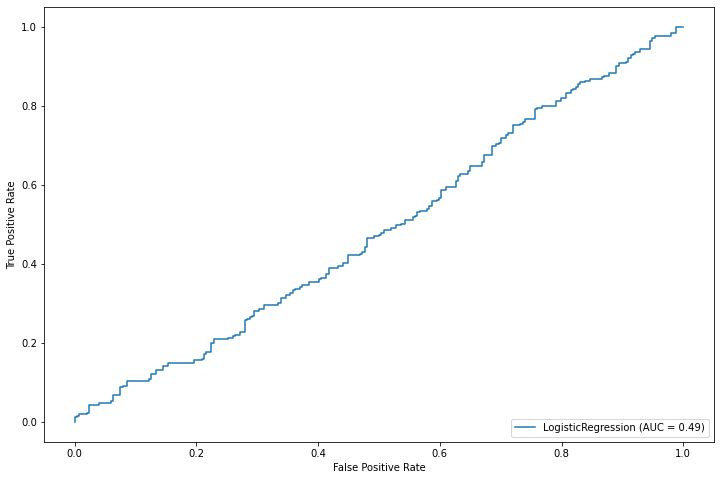

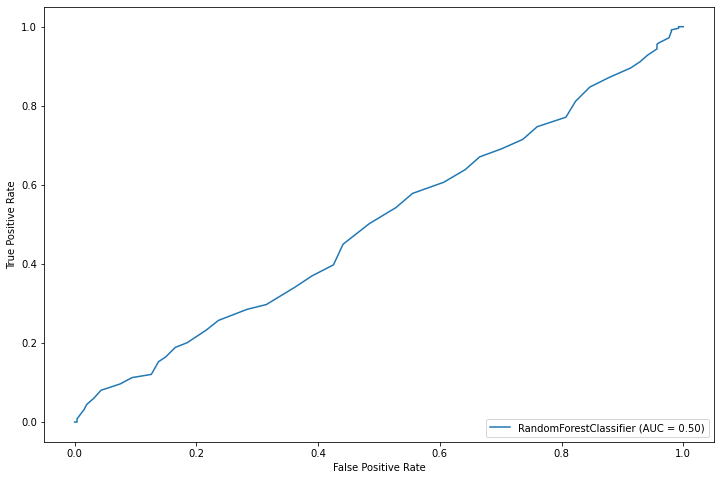

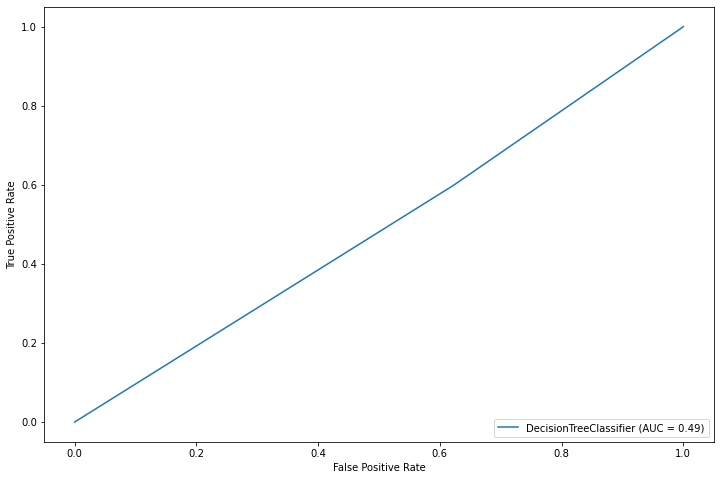

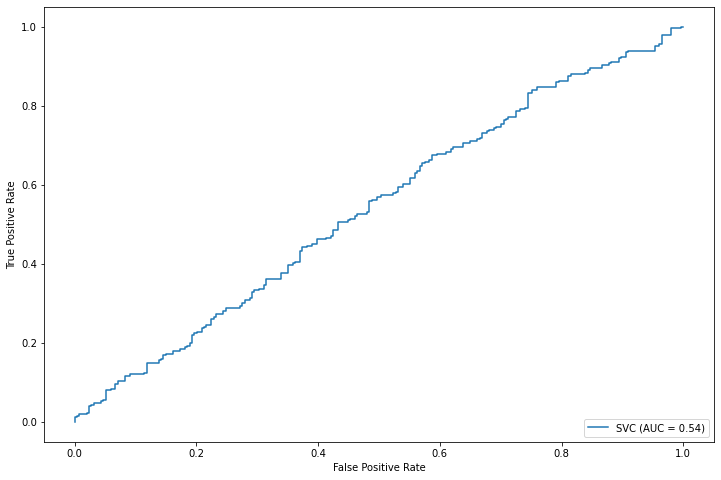

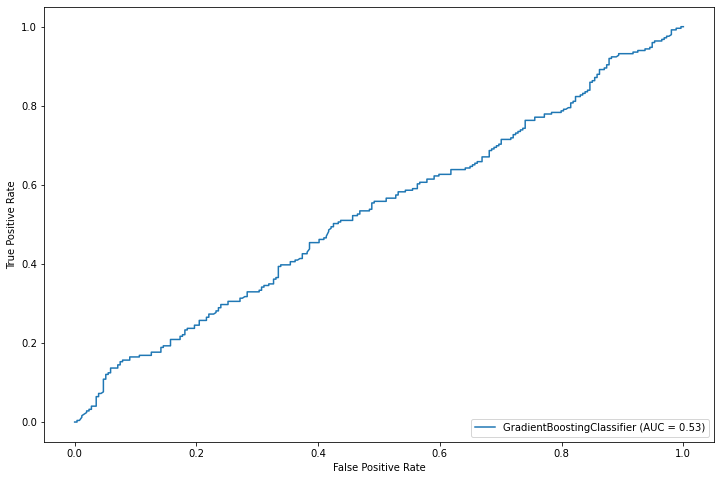

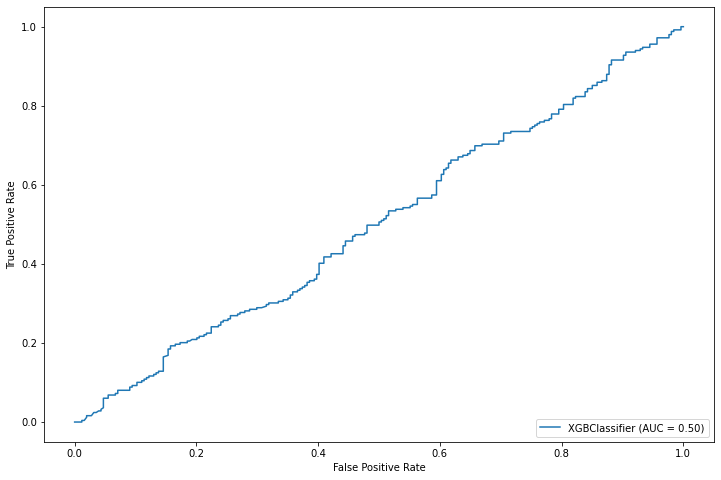

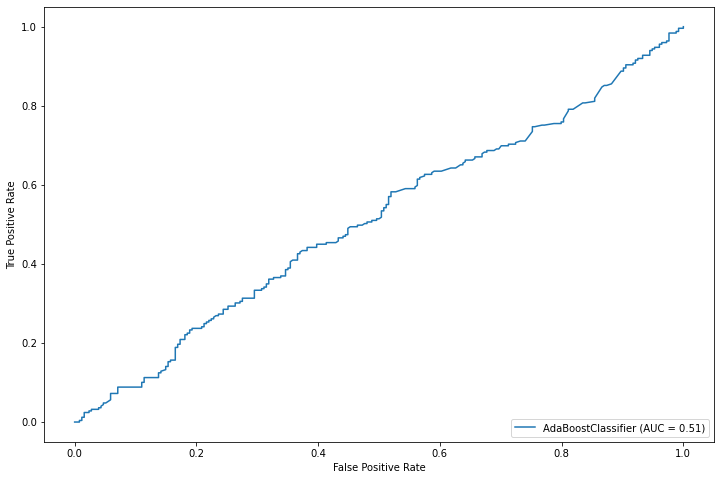

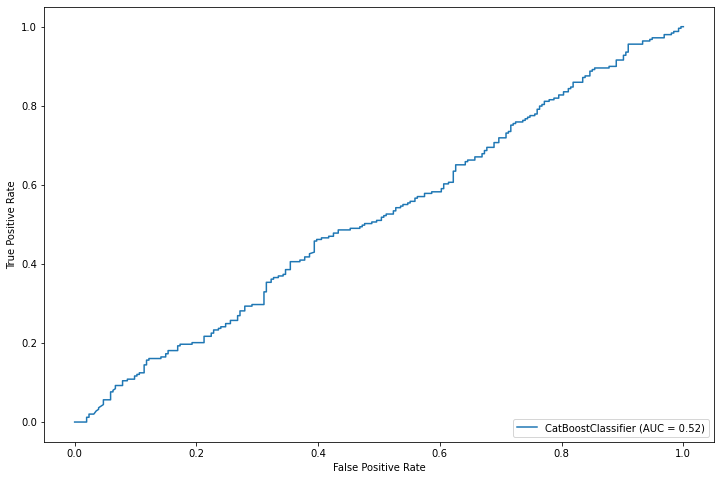

In [21]:
models(X_train,y_train, X_val,y_val)

# Automated Neural Network

In [25]:
import tensorflow as tf

# create sequential model method
def create_model(hp):
    nn_model = tf.keras.models.Sequential()
    # Activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])
    # Number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                   min_value =1,
                                                   max_value =25,
                                                   step =5), activation=activation, input_dim=10))
    for i in range(hp.Int('num_layers',1,5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_'+str(i),
                                                       min_value=1,
                                                       max_value=25,
                                                       step=5),
                                                       activation=activation))
    nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return nn_model

In [26]:
import keras_tuner as kt

tuner=kt.Hyperband(create_model, objective='val_accuracy',
                  factor=4, max_epochs=20,hyperband_iterations=6)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [27]:
tuner.search(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val))
tuner.results_summary()

Trial 264 Complete [00h 00m 08s]
val_accuracy: 0.5208747386932373

Best val_accuracy So Far: 0.5546719431877136
Total elapsed time: 00h 12m 11s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
activation: relu
first_units: 16
num_layers: 2
units_0: 11
units_1: 21
units_2: 21
units_3: 6
units_4: 21
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.5546719431877136
Trial summary
Hyperparameters:
activation: relu
first_units: 11
num_layers: 4
units_0: 21
units_1: 16
units_2: 11
units_3: 21
units_4: 16
tuner/epochs: 20
tuner/initial_epoch: 5
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 93d47e9ce9dd0ea6c03aa4badd4e0f05
Score: 0.5487077832221985
Trial summary
Hyperparameters:
activation: relu
first_units: 16
num_layers: 3
units_0: 21
units_1: 6
units_2: 11
units_3: 6
units_4: 6
tuner/epochs: 20
tuner/initial_epoch: 5
tuner/b

In [36]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [40]:
# Set a random sample
tf.random.set_seed(1000)
# Create Sequential model
model = tf.keras.models.Sequential()
# Create first layer of imput
model.add(tf.keras.layers.Dense(units = 16, activation='relu', input_dim=10))
# Create hidden layers
model.add(tf.keras.layers.Dense(units = 11, activation='relu'))
model.add(tf.keras.layers.Dense(units = 21, activation='relu'))
# Create output layer
model.add(tf.keras.layers.Dense(units =1, activation='sigmoid'))
# Structure model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_24 (Dense)             (None, 11)                187       
_________________________________________________________________
dense_25 (Dense)             (None, 21)                252       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 22        
Total params: 637
Trainable params: 637
Non-trainable params: 0
_________________________________________________________________


In [41]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
fit_model = model.fit(X_train_scaled,y_train, epochs=20, validation_split=0.03)

Epoch 1/20
145/145 [==============================] - 2s 5ms/step - loss: 0.6974 - accuracy: 0.4986 - val_loss: 0.6872 - val_accuracy: 0.5417
Epoch 2/20
145/145 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4943 - val_loss: 0.6848 - val_accuracy: 0.5486
Epoch 3/20
145/145 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5010 - val_loss: 0.6968 - val_accuracy: 0.5139
Epoch 4/20
145/145 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5014 - val_loss: 0.6905 - val_accuracy: 0.5486
Epoch 5/20
145/145 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5057 - val_loss: 0.6905 - val_accuracy: 0.5486
Epoch 6/20
145/145 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5120 - val_loss: 0.6900 - val_accuracy: 0.5069
Epoch 7/20
145/145 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5107 - val_loss: 0.6918 - val_accuracy: 0.4861
Epoch 

In [42]:
model.evaluate(X_val_scaled,y_val, verbose=2)
# Plot the model
# plot_roc_curve(model, X_val_scaled,y_val)

16/16 - 0s - loss: 0.6946 - accuracy: 0.5129


[0.6945963501930237, 0.512922465801239]

In [55]:
model.evaluate(X_test_scaled, y_test, verbose = 2)

16/16 - 0s - loss: 0.6978 - accuracy: 0.5179


[0.69775390625, 0.5178571343421936]

<AxesSubplot:>

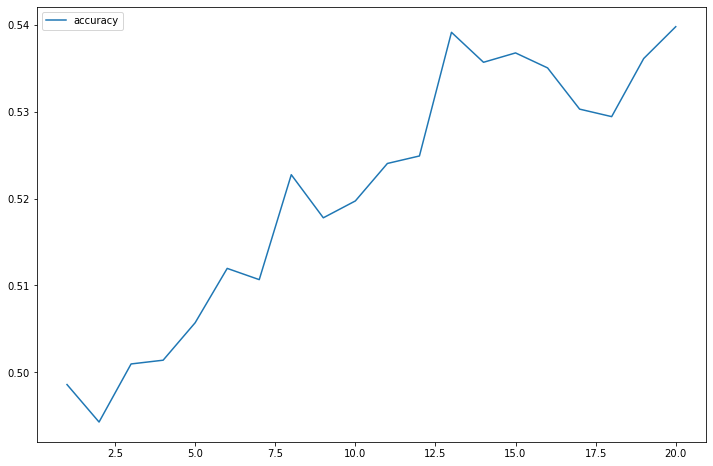

In [44]:
history_df=pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))
history_df.plot(y='accuracy')

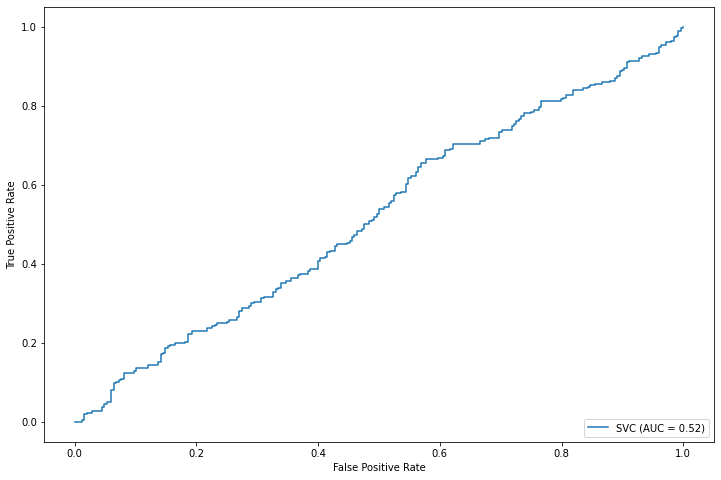

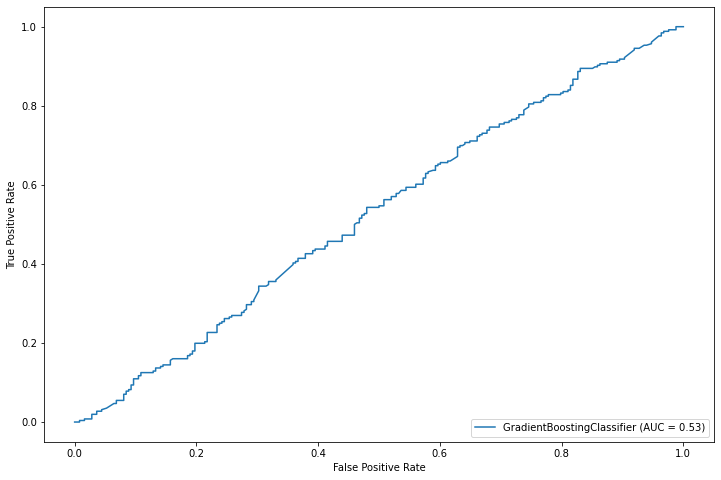

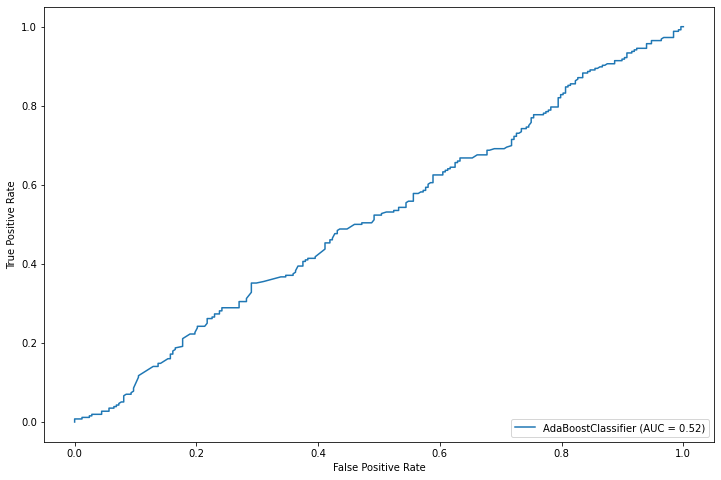

In [64]:
# Support Vector Machine classification shows best prediction
svc = SVC(random_state=70).fit(X_train,y_train)
gbc=GradientBoostingClassifier(random_state=70).fit(X_train,y_train)
dtc = DecisionTreeClassifier(random_state=70,criterion='gini',
                                 min_samples_leaf=4,max_depth=3)
abc = AdaBoostClassifier(random_state=70, 
                             learning_rate=0.1,
                            base_estimator=dtc).fit(X_train,y_train)

plot_roc_curve(svc, X_test, y_test)
plot_roc_curve(gbc, X_test, y_test)
plot_roc_curve(abc,X_test,y_test)